In [0]:
## Python3 is used.

## TABLE OF CONTENT

## 1. Import and mount Google Drive from google.colab library.
## 2. Set Tensorflow version 2.x
## 3. Import necessary libraries for algorithms and computations.
## 4. Access data file stored in the drive with h5py library. Read and store the training and test variables. Close the file.
## 5. Check the shape of the data sets (training and test).
## 6. Display a random image from each of training and test set to confirm if data is correct.
## 7. Reshape the data columns from 32x32 to 1024 features/columns in the dataset
##    as a single array of data is to be set for the model training for each instance. Check the target value percentage for classes 0 to 9.
## 8. Perform a traditional machine learning classifier on the data set first.
## 9. Apply KNN Classifier. Find an optimal value of n_neighbors and calculate the score on the validation set.
## 10. As the data set is very huge, KNN algorithm is taking too much time to find the optimal value of n_neighbors, therefore smaller training
##     and validation subsets are created.
## 11. Take in a value of n_neighbors that gives the best accuracy.
## 12. Apply KNN algorithm on the original dataset using the optimal value of the hyperparameter and calculate its score on the
##     original validation set.
## 13. Compute confusion matrix on the 10 classes along with recall and precision.
## 14. Note the observations.
## 15. Define classes and functions for a deep neural network that will use activation layers and batch normalization.
## 16. Linear layer, ReLU activation layer, Batch normalization layer classes are created along with cross entropy and softmax.
##     Stochastic gradient descent function performs the back propagation with gradient flow through all the layers in reverse order.
##     The original batch is divided into multiple mini batches with shuffled images
##     and then each minibatch data is made to pass through layers in feedforward method and then back propagated after the loss is computed.
## 17. In backpropagation method, the gradients flow from the loss till the original input.
##     Every trainable parameter is updated in the process.
## 18. A deep neural network is created with linear layers followed by ReLU activation. The output layer outputs 10 classes.
## 19. A test run is performed on this NN using a random learning rate and lambda.
## 20. Batch normalization class is created with forward and backward functions.
## 21. A second neural network is created with batch normalization layer added before every activation layer.
## 22. The network is run using learning rate of 1 and lambda of 0.0001.
## 23. Test the network on a random image in the validation set.
## 24. Compute and display confusion matrix along with recall and precision.
## 25. Note the observations.

In [0]:
#Import Drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers

#Import h5py library to read data file stored in Google Drive.
import h5py

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from sklearn.neighbors import KNeighborsClassifier

from random import shuffle

import math

In [0]:
#Access data file in read mode.
h5f = h5py.File('/content/drive/My Drive/PGP-AIML/Introduction to Neural Network and Deep Learning/Project/SVHN_single_grey1.h5', 'r')

In [0]:
#Read data into variables
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_val = h5f['X_test'][:]
y_val = h5f['y_test'][:]

In [0]:
#Close file
h5f.close()

In [0]:
#Check shapes of data sets.
print("Training set feature shape", X_train.shape)
print("Training set target shape", y_train.shape)
print("Validation set feature shape", X_val.shape)
print("Validation set target shape", y_val.shape)

Training set feature shape (42000, 32, 32)
Training set target shape (42000,)
Validation set feature shape (18000, 32, 32)
Validation set target shape (18000,)


In [0]:
#So there are 60000 records of data. Each data/image is a 32x32 size data in RGB format.
#There are 42000 records in training set and 18000 records in validation set.

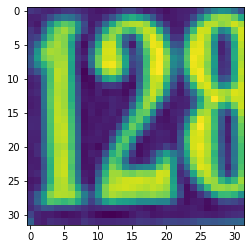

y (training):  2


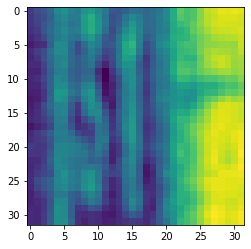

y (validation):  1


In [0]:
#Check if the images are showing up for both training and validation sets.
plt.imshow(X_train[0])    #Show first image in the training set.
plt.show()
print('y (training): ', y_train[0])
plt.imshow(X_val[0])    #Show first image in the validation set.
plt.show()
print('y (validation): ', y_val[0])

In [0]:
#Now reshape the feature set from 32x32 into 1024 features.
X_train = X_train.reshape(42000, 1024)
X_val = X_val.reshape(18000, 1024)

In [0]:
#Normalize inputs from 0-255 to 0-1
#Denominator should be float else would become zero
X_train = X_train / 255.0
X_val = X_val / 255.0

In [0]:
for i in range(0,10):
    print("Label: {0} | Value % = {1}".format( i, (y_train[y_train == i].size / y_train.size)*100) )

Label: 0 | Value % = 9.966666666666667
Label: 1 | Value % = 9.933333333333334
Label: 2 | Value % = 9.992857142857142
Label: 3 | Value % = 10.192857142857143
Label: 4 | Value % = 9.971428571428572
Label: 5 | Value % = 10.076190476190476
Label: 6 | Value % = 9.923809523809524
Label: 7 | Value % = 9.980952380952381
Label: 8 | Value % = 9.971428571428572
Label: 9 | Value % = 9.99047619047619


In [0]:
print(X_train.shape)
print(X_val.shape)

(42000, 1024)
(18000, 1024)


In [0]:
#KNN Classifier
#Testing traditional machine learning classifier to this dataset of images.

In [0]:
#To find the optimal value of n neighbors, the next step runs a loop of KNN algorithm for different value of n neighbors.
#As this loop runs multiple KNN evaluations on such a huge dataset, the computation is very intensive and thus taking very long time.
#To resolve this, the next step makes subsets of the dataset (10000 training images and 2000 test images).

knnX_train = X_train[0:10000, :]
knny_train = y_train[0:10000]

knnX_val = X_val[0:2000, :]
knny_val = y_val[0:2000]

print(knnX_train.shape)
print(knny_train.shape)
print(knnX_val.shape)
print(knny_val.shape)

(10000, 1024)
(10000,)
(2000, 1024)
(2000,)


In [0]:
#Find the optimal value of n_neighbors to have the optimal KNN classifier.

knnScores = []
for i in range(20, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    #Fit the model
    knn.fit(knnX_train, knny_train)
    #Get the score
    knnScore = knn.score(knnX_val, knny_val)
    print("KNN Accuracy = {0} | n_neighbors = {1}".format(knnScore, i))
    #knnScore
    knnScores.append(knnScore)

KNN Accuracy = 0.451 | n_neighbors = 20
KNN Accuracy = 0.4475 | n_neighbors = 21
KNN Accuracy = 0.447 | n_neighbors = 22
KNN Accuracy = 0.453 | n_neighbors = 23
KNN Accuracy = 0.451 | n_neighbors = 24
KNN Accuracy = 0.453 | n_neighbors = 25
KNN Accuracy = 0.4475 | n_neighbors = 26
KNN Accuracy = 0.4505 | n_neighbors = 27
KNN Accuracy = 0.455 | n_neighbors = 28
KNN Accuracy = 0.4505 | n_neighbors = 29


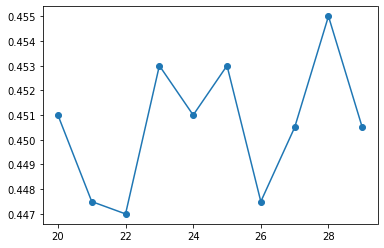

In [0]:
plt.plot(range(20,30), knnScores, 'o-')

In [0]:
knnScores2 = []
for i in range(5, 15):
    knn = KNeighborsClassifier(n_neighbors = i)
    #Fit the model
    knn.fit(knnX_train, knny_train)
    #Get the score
    knnScore = knn.score(knnX_val, knny_val)
    print("KNN Accuracy = {0} | n_neighbors = {1}".format(knnScore, i))
    #knnScore
    knnScores2.append(knnScore)

KNN Accuracy = 0.415 | n_neighbors = 5
KNN Accuracy = 0.422 | n_neighbors = 6
KNN Accuracy = 0.421 | n_neighbors = 7
KNN Accuracy = 0.4355 | n_neighbors = 8
KNN Accuracy = 0.433 | n_neighbors = 9
KNN Accuracy = 0.433 | n_neighbors = 10
KNN Accuracy = 0.441 | n_neighbors = 11
KNN Accuracy = 0.443 | n_neighbors = 12
KNN Accuracy = 0.445 | n_neighbors = 13
KNN Accuracy = 0.4445 | n_neighbors = 14


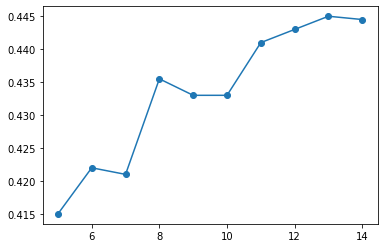

In [0]:
plt.plot(range(5,15), knnScores2, 'o-')

In [0]:
knnScores3 = []
for i in range(40, 50):
    knn = KNeighborsClassifier(n_neighbors = i)
    #Fit the model
    knn.fit(knnX_train, knny_train)
    #Get the score
    knnScore = knn.score(knnX_val, knny_val)
    print("KNN Accuracy = {0} | n_neighbors = {1}".format(knnScore, i))
    #knnScore
    knnScores3.append(knnScore)

KNN Accuracy = 0.454 | n_neighbors = 40
KNN Accuracy = 0.452 | n_neighbors = 41
KNN Accuracy = 0.4505 | n_neighbors = 42
KNN Accuracy = 0.451 | n_neighbors = 43
KNN Accuracy = 0.4495 | n_neighbors = 44
KNN Accuracy = 0.448 | n_neighbors = 45
KNN Accuracy = 0.4455 | n_neighbors = 46
KNN Accuracy = 0.447 | n_neighbors = 47
KNN Accuracy = 0.45 | n_neighbors = 48
KNN Accuracy = 0.448 | n_neighbors = 49


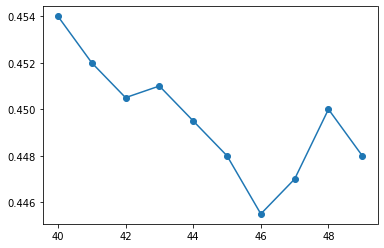

In [0]:
plt.plot(range(40,50), knnScores3, 'o-')

In [0]:
knnScores4 = []
for i in range(95, 105):
    knn = KNeighborsClassifier(n_neighbors = i)
    #Fit the model
    knn.fit(knnX_train, knny_train)
    #Get the score
    knnScore = knn.score(knnX_val, knny_val)
    print("KNN Accuracy = {0} | n_neighbors = {1}".format(knnScore, i))
    #knnScore
    knnScores4.append(knnScore)

KNN Accuracy = 0.431 | n_neighbors = 95
KNN Accuracy = 0.429 | n_neighbors = 96
KNN Accuracy = 0.432 | n_neighbors = 97
KNN Accuracy = 0.432 | n_neighbors = 98
KNN Accuracy = 0.433 | n_neighbors = 99
KNN Accuracy = 0.4335 | n_neighbors = 100
KNN Accuracy = 0.4335 | n_neighbors = 101
KNN Accuracy = 0.432 | n_neighbors = 102
KNN Accuracy = 0.4335 | n_neighbors = 103
KNN Accuracy = 0.4335 | n_neighbors = 104


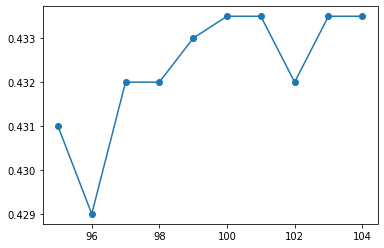

In [0]:
plt.plot(range(95,105), knnScores4, 'o-')

In [0]:
#Taking n_neighbors = 28.

In [0]:
knn = KNeighborsClassifier(n_neighbors = 28)
#Fit the model
knn.fit(X_train, y_train)
print("Fit completed..")
#Predict y values for X
knny_val = knn.predict(X_val)
print("y values predicted..")
#Get the score
knnScore = knn.score(X_val, y_val)
print("KNN Classifier Accuracy = {0}".format(knnScore))

Fit completed..
y values predicted..
KNN Classifier Accuracy = 0.5319444444444444


In [0]:
knnCM = confusion_matrix(y_val, knny_val)
print('Confusion Matrix:')
print(knnCM)

#As precision and recall are class level performance measures, we calculate them for all 10 classes.
knnRecall = recall_score(y_val, knny_val, average=None)
print('\nRecall:')
print(knnRecall)
knnPrecision = precision_score(y_val, knny_val, average=None)
print('\nPrecision:')
print(knnPrecision)

Confusion Matrix:
[[1276   59   32   43   50   31   94   44   63  122]
 [  98 1342   49   81   77   32   31   53   33   32]
 [  88  247  964   94   49   43   31  159   44   84]
 [ 116  271  119  739   57  162   37   54  103   61]
 [ 110  247   35   53 1179   22   52   23   37   54]
 [ 141  161   50  241   77  715  136   35  125   87]
 [ 308  126   30   61  149  119  757   22  211   49]
 [  99  203  113   75   42   32   39 1134   25   46]
 [ 258  144   58  111   94   95  251   27  661  113]
 [ 305  145   61   85   67   97   47   73  116  808]]

Recall:
[0.70341786 0.73413567 0.53466445 0.42990111 0.65066225 0.40441176
 0.41320961 0.62721239 0.36479029 0.44789357]

Precision:
[0.4558771  0.45568761 0.63798809 0.46683512 0.64041282 0.53041543
 0.51322034 0.69827586 0.46614951 0.55494505]


In [0]:
result = pd.DataFrame({'Class' : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      'Recall' : [knnRecall[0], knnRecall[1], knnRecall[2], knnRecall[3], knnRecall[4], knnRecall[5], knnRecall[6], knnRecall[7], knnRecall[8], knnRecall[9]],
                      'Precision' : [knnPrecision[0], knnPrecision[1], knnPrecision[2], knnPrecision[3], knnPrecision[4], knnPrecision[5], knnPrecision[6], knnPrecision[7], knnPrecision[8], knnPrecision[9]]})
result.T

,0,1,2,3,4,5,6,7,8,9
Class,0,1,2,3,4,5,6,7,8,9
Recall,0.703418,0.734136,0.534664,0.429901,0.650662,0.404412,0.41321,0.627212,0.36479,0.447894
Precision,0.455877,0.455688,0.637988,0.466835,0.640413,0.530415,0.51322,0.698276,0.46615,0.554945


In [0]:
## Observations

An accuracy of ~53% has been achieved using KNN algorithm for classification (a ML classifier).

1. KNN classifier comes out to be very computation heavy algorithm.

2. The KNN classifier took too much time to calculate score on the original data set, because of which a subset of 10000 training images had to be created and then find an optimal value of the hyperparameter n_neighbors.

3. The class label '1' has the best recall score of around 73% than the rest and the class label '7' has the best precision score of around 69% than the rest.

4. Looking at the final score of ~53%, the algorithm performed poorly in the classification.

# Deep Neural Network

In [0]:
class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None

    def forward(self, X):
        self.X = X
        output = np.dot(self.X, self.W) + self.b
        #print("Linear Forward, ", output.shape)
        return output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        #print("Linear Backward, gradW = {0} | gradB = {1} | gradInput = {2} | nextgrad = {3}".format(self.gradW.shape, self.gradB.shape, self.gradInput.shape, nextgrad.shape))
        return self.gradInput, [self.gradW, self.gradB]

In [0]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        #print("ReLU forward, ", self.output.shape)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        #print("ReLU backward, gradInput = ", self.gradInput.shape)
        return self.gradInput, []

In [0]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [0]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

In [0]:
class NN():
    def __init__(self, lossfunc=CrossEntropy(), mode='train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)  + ((Lambda / (2 * y.shape[0])) * np.sum([np.sum(w**2) for w in self.params[0][0]]))
        nextgrad = self.loss_func.backward(out,y) + ((Lambda/y.shape[0]) * np.sum([np.sum(w) for w in self.params[0][0]]))
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

In [0]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.5):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

In [0]:
# get minibatches
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]

        minibatches.append((X_batch, y_batch))
    return minibatches

In [0]:
def sgd(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu=0.5, X_val=None, y_val=None, Lambda=0, verb=True):
    val_loss_epoch = []
    train_loss_epoch = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    for i in range(epoch):
        if( len(train_loss_epoch) > 2 ):
            if( (train_loss_epoch[len(train_loss_epoch)-1]) - (train_loss_epoch[len(train_loss_epoch)-2]) > 0 ):
                if learning_rate >= 0.0001 :
                    learning_rate = learning_rate/10;
        
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for ii in range(0, m_train, minibatch_size):
            X_tr = X_train[ii:ii + minibatch_size, : ]
            y_tr = y_train[ii:ii + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for ii in range(0, m_val, minibatch_size):
            X_va = X_val[ii:ii + minibatch_size, : ]
            y_va = y_val[ii:ii + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        train_loss_epoch.append(mean_train_loss)
        val_loss_epoch.append(mean_val_loss)

        if verb:
            #if i%50==0:
            print("Epoch {3}/{4}: Loss = {0} | LR = {5} | Mu = {6} | Training Accuracy = {1} | Validation Accuracy = {2}".format(mean_train_loss, train_acc, val_acc, i+1, epoch, learning_rate, mu))
    return net, val_acc

In [0]:
def check_accuracy(y_true, y_pred):
    count = 0
    for i,j in zip(y_true, y_pred):
        if int(i)==j:
            count +=1
    return float(count)/float(len(y_true))

In [0]:
def NN1(iterations, lr, lambdaa = 0, verb=True):
    input_dim = X_train.shape[1]
    Lambda = 0
    Lambda = lambdaa

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, 50))
    nn.add_layer(ReLU())
    nn.add_layer(Linear(50, 20))
    nn.add_layer(ReLU())
    nn.add_layer(Linear(20, output_nodes))

    nn, val_acc = sgd(nn, X_train , y_train, minibatch_size=1000, epoch=iterations, learning_rate=learning_rate, X_val=X_val, y_val=y_val, Lambda=Lambda, verb=verb)
    return nn, val_acc

In [0]:
#Run using a random learning rate.
Lambda = 0
net, val_acc = NN1(200, lr = 2)

Epoch 1/200: Loss = 2.3037816751541875 | LR = 2 | Mu = 0.5 | Training Accuracy = 0.09966666666666667 | Validation Accuracy = 0.10077777777777777
Epoch 2/200: Loss = 2.303809865641167 | LR = 2 | Mu = 0.5 | Training Accuracy = 0.09966666666666667 | Validation Accuracy = 0.10077777777777777
Epoch 3/200: Loss = 2.303665295000026 | LR = 2 | Mu = 0.5 | Training Accuracy = 0.09966666666666667 | Validation Accuracy = 0.10077777777777777
Epoch 4/200: Loss = 2.303098736242354 | LR = 2 | Mu = 0.5 | Training Accuracy = 0.10954761904761905 | Validation Accuracy = 0.10727777777777778
Epoch 5/200: Loss = 2.303141254364943 | LR = 2 | Mu = 0.5 | Training Accuracy = 0.10016666666666667 | Validation Accuracy = 0.10305555555555555
Epoch 6/200: Loss = 2.300872222027612 | LR = 0.2 | Mu = 0.5 | Training Accuracy = 0.13452380952380952 | Validation Accuracy = 0.1348888888888889
Epoch 7/200: Loss = 2.292144743427297 | LR = 0.2 | Mu = 0.5 | Training Accuracy = 0.1519761904761905 | Validation Accuracy = 0.1518333

In [0]:
# The loss was decreasing gradually. We achieved ~51% accuracy in training and validation sets.
# So, overall a good effort by the model with 200 epochs.

Apply Batch Normalization

In [0]:
#Creating the necessary batch normailzation class.

class BatchNormalization():
    #Initialize class variables
    def __init__(self, size):
        self.gamma = np.ones(size).T #shape = (size,)
        self.beta = np.ones(size).T * 0.1 #shape = (size,)
        self.eps = 1e-6
        self.params = [self.gamma, self.beta]
        self.dX = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, X):
        N, D = X.shape

        #Calculate mean
        mean = 1./N * np.sum(X, axis = 0)

        #Subtract mean vector of every trainings example
        self.X1 = X - mean

        #Following the lower branch - calculation denominator
        sq = self.X1 ** 2

        #Calculate variance
        self.var = 1./N * np.sum(sq, axis = 0)

        #Add eps for numerical stability, then sqrt
        self.sqrtvar = np.sqrt(self.var + self.eps)

        #Invert sqrtwar
        self.ivar = 1./self.sqrtvar

        #Execute normalization
        self.Xhat = self.X1 * self.ivar

        #Nor the two transformation steps
        gammaX = self.gamma * self.Xhat

        #Calculate and return output
        out = gammaX + self.beta

        return out


    #Store normalized X in a class variable to be used later in back propagation.
    #Calculate normalized X by subtracting mean and dividing by standard deviation.
    #Store normalized X in a class variable to be used later in back propagation.
    def forward2(self, X):
        self.X = X
        
        mean = X.mean(axis=0)
        var = X.var(axis=0)
        self.sd = np.sqrt(var + self.eps)
        X_norm = (X - mean) / self.sd
        #y = np.dot(X_norm, self.gamma) + self.beta
        y = X_norm * self.gamma + self.beta
        
        self.X_norm = X_norm
        #print("BN Forward, self.gamma = {0}, self.beta = {1}".format(self.gamma, self.beta))
        #print("BN Forward, X_norm = {0} | y = {1}".format(X_norm.shape, y.shape))
        return y


    def backward(self, nextgrad):
        #Get the dimensions of the input/output
        N,D = nextgrad.shape

        self.dbeta = np.sum(nextgrad, axis=0)
        dgammax = nextgrad #not necessary, but more understandable

        self.dgamma = np.sum(dgammax*self.Xhat, axis=0)
        dxhat = dgammax * self.gamma

        divar = np.sum(dxhat*self.X1, axis=0)
        dxmu1 = dxhat * self.ivar

        dsqrtvar = -1. /(self.sqrtvar**2) * divar

        dvar = 0.5 * 1. /np.sqrt(self.var+self.eps) * dsqrtvar

        dsq = 1. /N * np.ones((N,D)) * dvar

        dxmu2 = 2 * self.X1 * dsq

        dx1 = (dxmu1 + dxmu2)
        dmu = -1 * np.sum(dxmu1+dxmu2, axis=0)

        dx2 = 1. /N * np.ones((N,D)) * dmu

        self.dX = dx1 + dx2

        return self.dX, [self.dgamma, self.dbeta]


    #Calculate differential of output with respect to input X,
    #differential of output with respect to gamma and differential of output with respect to beta.
    def backward2(self, nextgrad):
        #print("nextgrad", nextgrad.shape) 1000x50 or 1000x20
        #self.gradInput = (np.dot(nextgrad, self.gamma)) / self.sd #1000x50 or 1000x20
        self.gradInput = self.gamma/self.sd * nextgrad #Nx50 or Nx20
        #print("gradinput", self.gradInput.shape)
        #print(" ")
        #self.gradgamma = np.dot(self.X_norm.T, nextgrad) #50x50 or 20x20
        self.gradgamma = np.dot(self.X_norm.T, nextgrad)
        self.gradgamma = np.sum(self.gradgamma, axis=0)
        self.gradgamma = np.sum(self.gradgamma) #1x1
        #self.gradbeta = nextgrad
        self.gradbeta = np.sum(nextgrad, axis=0) #50x1 or 20x1
        self.gradbeta = np.sum(nextgrad) #1x1
        #self.gradbeta = self.gradbeta.T #1x50 or 1x20
        #print("gradbeta", self.gradbeta.shape)
        #print(" ")
        #print("BN Backward, gradInput = {0} | gradgamma = {1} | gradbeta = {2}".format(self.gradInput.shape, self.gradgamma, self.gradbeta))
        #self.gamma = self.gamma + self.gradgamma
        #self.beta = self.beta + self.gradbeta
        return self.gradInput, [self.gradgamma, self.gradbeta]

In [0]:
def NN2(iterations, lr, lambdaa = 0, verb=True):
    input_dim = X_train.shape[1]
    Lambda = 0
    Lambda = lambdaa

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, 50))
    nn.add_layer(BatchNormalization(50))
    nn.add_layer(ReLU())
    nn.add_layer(Linear(50, 20))
    nn.add_layer(BatchNormalization(20))
    nn.add_layer(ReLU())
    nn.add_layer(Linear(20, output_nodes))

    nn, val_acc = sgd(nn, X_train , y_train, minibatch_size=1000, epoch=iterations, learning_rate=learning_rate,\
                      X_val=X_val, y_val=y_val, Lambda=Lambda, verb=verb)
    return nn, val_acc

In [0]:
Lambda = 0
net, val_acc = NN2(1000, lr = 1, lambdaa = 0.0001)

Epoch 1/1000: Loss = 2.0585747024534076 | LR = 1 | Mu = 0.5 | Training Accuracy = 0.3637619047619048 | Validation Accuracy = 0.35938888888888887
Epoch 2/1000: Loss = 1.6209911312620913 | LR = 1 | Mu = 0.5 | Training Accuracy = 0.527547619047619 | Validation Accuracy = 0.5281666666666667
Epoch 3/1000: Loss = 1.3364375438656004 | LR = 1 | Mu = 0.5 | Training Accuracy = 0.5940714285714286 | Validation Accuracy = 0.5879444444444445
Epoch 4/1000: Loss = 1.1793368978016403 | LR = 1 | Mu = 0.5 | Training Accuracy = 0.5615952380952381 | Validation Accuracy = 0.5601111111111111
Epoch 5/1000: Loss = 1.092384525881713 | LR = 1 | Mu = 0.5 | Training Accuracy = 0.6295238095238095 | Validation Accuracy = 0.6212777777777778
Epoch 6/1000: Loss = 1.005041009525014 | LR = 1 | Mu = 0.5 | Training Accuracy = 0.6997619047619048 | Validation Accuracy = 0.6885
Epoch 7/1000: Loss = 0.9613542876404909 | LR = 1 | Mu = 0.5 | Training Accuracy = 0.6693809523809524 | Validation Accuracy = 0.6569444444444444
Epoch 

Predicted:  8
Ground Truth:  8


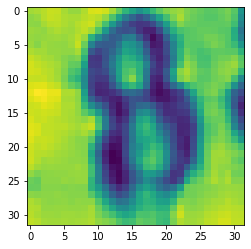

In [0]:
#Test the network on a random image in the validation set.

plt.imshow(X_val[10].reshape(32,32))
print("Predicted: ", net.predict(X_val[10])[0])
print("Ground Truth: ", y_val[10])

In [0]:
print("Validation Accuracy: ", val_acc, "\n")

NN2y = net.predict(X_val)

NN2CM = confusion_matrix(y_val, NN2y)
print('Confusion Matrix:')
print(NN2CM)

#As precision and recall are class level performance measures, we calculate them for all 10 classes.
NN2Recall = recall_score(y_val, NN2y, average=None)
print('\nRecall:')
print(NN2Recall)
NN2Precision = precision_score(y_val, NN2y, average=None)
print('\nPrecision:')
print(NN2Precision)

Validation Accuracy:  0.8095 

Confusion Matrix:
[[1535   33   15   22   33   10   34   34   32   66]
 [  30 1498   30   39   80   14   16   63   27   31]
 [  19   27 1479   43   35   11    9   90   33   57]
 [  11   26   37 1344   25  128   22   38   42   46]
 [  28   66   34   27 1506   16   46   12   40   37]
 [  10   14   12  108   18 1418   92   14   45   37]
 [  56   13   14   29   50   75 1469   12   96   18]
 [  16   61   67   44   14    9    7 1545   19   26]
 [  28   27   30   68   25   52  101   13 1407   61]
 [  66   32   38   60   26   59   13   24   77 1409]]

Recall:
[0.84619625 0.81947484 0.8202995  0.78184991 0.83112583 0.8020362
 0.8018559  0.8545354  0.77649007 0.78104213]

Precision:
[0.85325181 0.83361157 0.84225513 0.75336323 0.83112583 0.79129464
 0.81205086 0.83739837 0.77392739 0.78803132]


In [0]:
NNresult = pd.DataFrame({'Class' : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      'Recall' : [NN2Recall[0], NN2Recall[1], NN2Recall[2], NN2Recall[3], NN2Recall[4], NN2Recall[5], NN2Recall[6], NN2Recall[7], NN2Recall[8], NN2Recall[9]],
                      'Precision' : [NN2Precision[0], NN2Precision[1], NN2Precision[2], NN2Precision[3], NN2Precision[4], NN2Precision[5], NN2Precision[6], NN2Precision[7], NN2Precision[8], NN2Precision[9]]})
NNresult.T

,0,1,2,3,4,5,6,7,8,9
Class,0,1,2,3,4,5,6,7,8,9
Recall,0.846196,0.819475,0.8203,0.78185,0.831126,0.802036,0.801856,0.854535,0.77649,0.781042
Precision,0.853252,0.833612,0.842255,0.753363,0.831126,0.791295,0.812051,0.837398,0.773927,0.788031


In [0]:
##Observations

An approximate 81% accuracy has been achieved in a thousand epochs using a deep neural network with multiple batch normalization and activation layers on the validation set that consists of 18000 images.

1. Compared to the neural network without batch normalization, this neural network is much quicker and achieved higher accuracy in less time.

2. Compared to the KNN classifier, this neural network is much more accurate and much more quicker.

3. With KNN algorithm, an optimal value of n_neighbors is used, and 53% accuracy is the best that could be achieved.

4. With traditional machine learning algorithms on image detection, it seems like they perform up to a level of accuracy and could not go beyond that.

5. Batch normalization is the key which makes the difference between the 2 neural networks used. It helps in normalizing the input and provide unit gaussians in the output, thereby reducing the loss very quickly.

6. Looking at class level accuracy, both recall and precision came out good, in the range of 75% to 85%. Recall is least for class labelled '8' and maximum for class labelled '7'. Precision is least for class labelled '3' and maximum for class labelled '0'.

7. A deeper neural network layer performs better than a shallow network as it makes the network more non linear.

8. With high learning rate, we cannot expect much loss after a certain point, whereas with a smaller learning rate, we can expect to achieve a much smaller loss but with higher number of epochs and slow speed.

9. The approach to divide the learning rate by 10 whenever the loss increases worked. With this approach, the network was able to find the minimum loss in shorter time and lesser epochs.